In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
import math

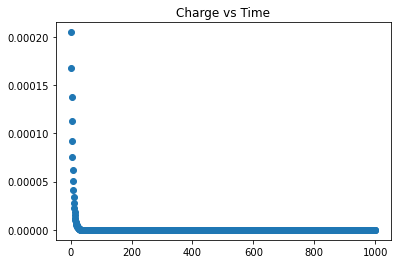

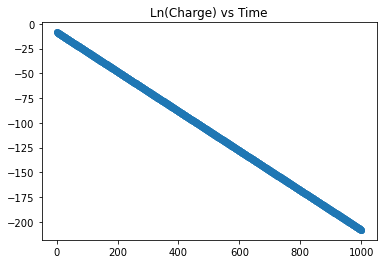

In [12]:
dt = pd.read_pickle('capacitor_dataset.pickle')


# Q = 5C e^(-t/RC) 
# given values of time and charge

siz = len(dt)

X = dt[:siz,0]
Y = dt[:siz,1]

plt.figure(1)
plt.title("Charge vs Time")
plt.scatter(X,Y)

# take log on both sides 
# ln(Q) = ln(5C) -t/RC

for i in range(siz):
    Y[i] = math.log(Y[i])
    

plt.figure(2)
plt.title("Ln(Charge) vs Time")
plt.scatter(X,Y)

In [13]:
# now for this 2nd figure, we must find the best fitting line

reg = linear_model.LinearRegression()
reg.fit(X.reshape(-1, 1), Y)

print("The slope is " + str(reg.coef_[0]))
print("The intercept is "+str(reg.intercept_))

# calculating for value of C & R according to the best fit line
# ln(Q) = ln(5C) -t/RC

# therefore C = (e^(intercept))/5

C = (math.e**(reg.intercept_))/5

# slope is -1/RC

R = -1/(C*reg.coef_[0])
print(" ")
print("The Capacitance(C) is " + str(C))
print("The Resistance(R) is " + str(R))

The slope is -0.19999999999999984
The intercept is -8.29404964010213
 
The Capacitance(C) is 4.999999999999487e-05
The Resistance(R) is 100000.00000001033
